Step 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_h4_3337.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


- There are 200 entries.
- No null values in any columns.

In [4]:
# How many unique values are in each column?
for column in df:
    print(column, df[column].nunique())

CustomerID 200
Gender 2
Age 51
Annual Income (k$) 64
Spending Score (1-100) 84


### Step 2 ###

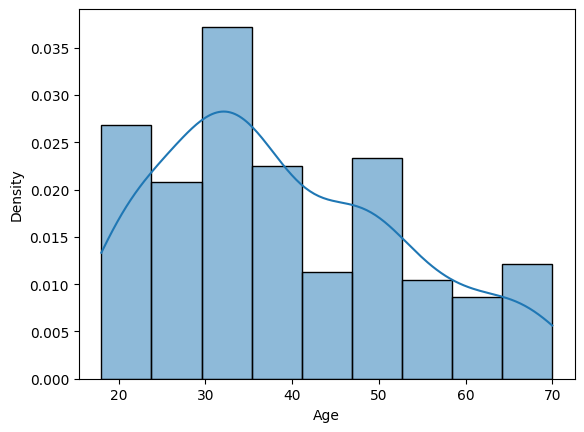

In [5]:
sns.histplot(x=df['Age'], kde=True, stat='density')
plt.show()

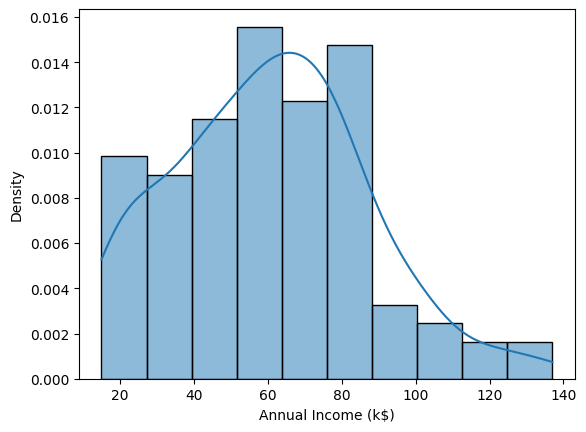

In [6]:
sns.histplot(x=df['Annual Income (k$)'], kde=True, stat='density')
plt.show()

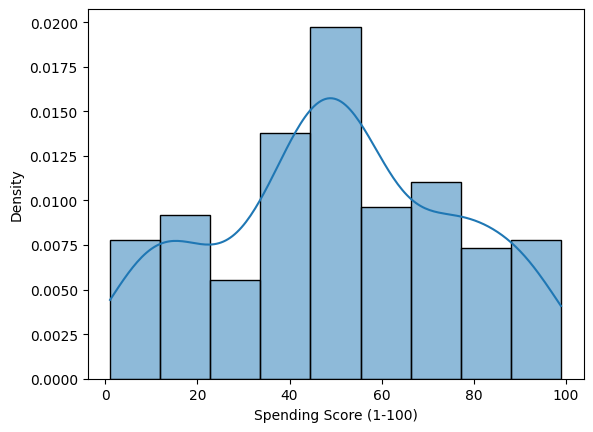

In [7]:
sns.histplot(x=df['Spending Score (1-100)'], kde=True, stat='density')
plt.show()

- Age varies drastically, with most in the range of 20 - 50
- Most people have income from 20k to 80k.
- The highest number of spending score are from 40 - 60.

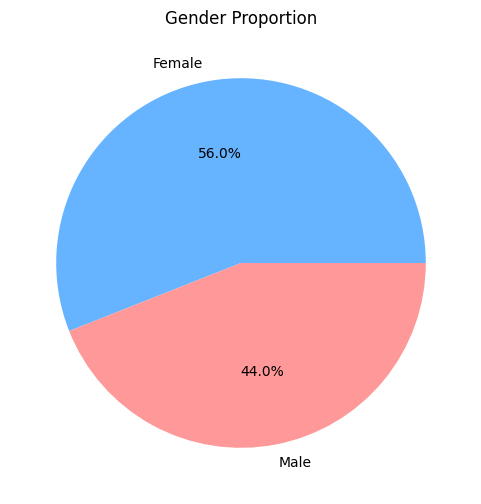

In [8]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Gender Proportion')
plt.show()


The dataset has a fairly balanced gender distribution, so gender bias in subsequent analysis should be minimal.

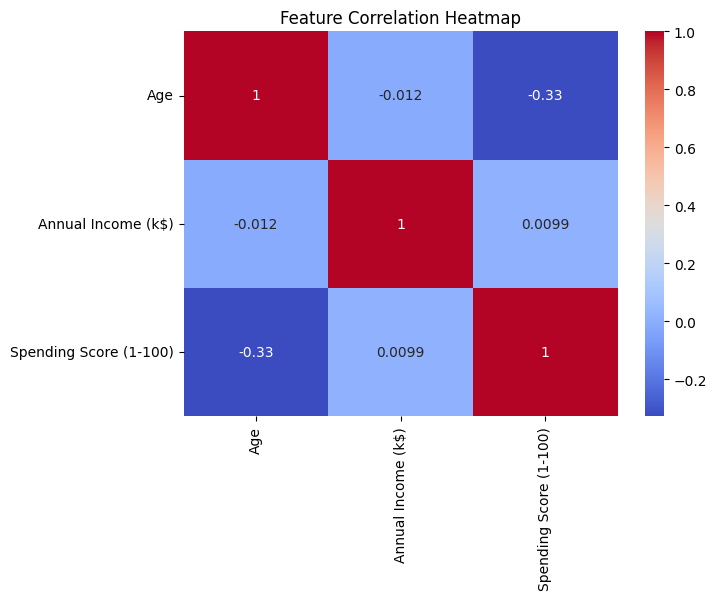

In [9]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(df.drop('CustomerID', axis=1).select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


- Features have little correlations to each other.
- No multicollinearity occured.

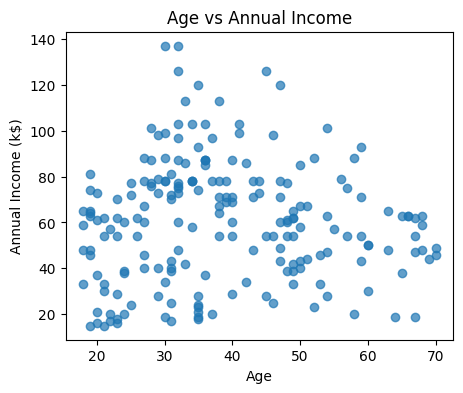

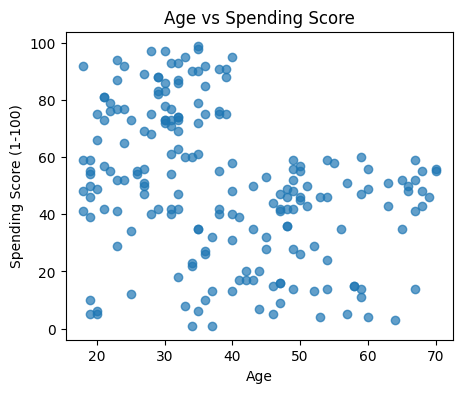

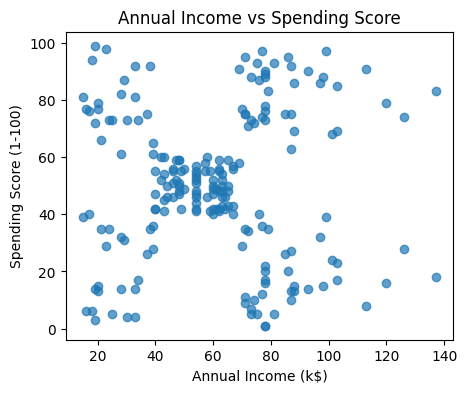

In [10]:
# Age vs Annual Income
plt.figure(figsize=(5,4))
plt.scatter(df['Age'], df['Annual Income (k$)'], alpha=0.7)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# Age vs Spending Score
plt.figure(figsize=(5,4))
plt.scatter(df['Age'], df['Spending Score (1-100)'], alpha=0.7)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Annual Income vs Spending Score
plt.figure(figsize=(5,4))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.7)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


There is no strong linear relationship between age/income and spending score, but some patterns suggest the presence of clusters (e.g., high income with both high and low spending).

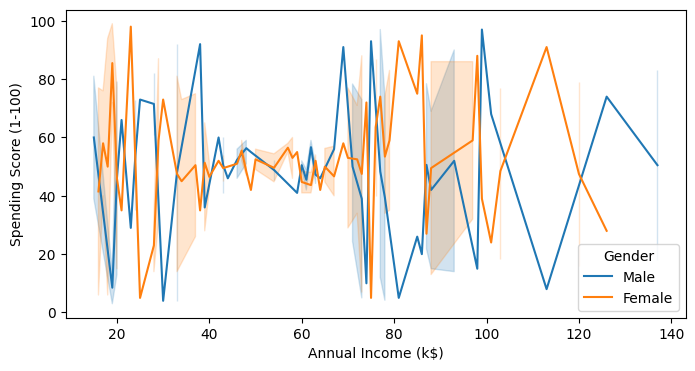

In [22]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.show()

Both genders display similar patterns; no significant gender-based difference in the relationship between income and spending score.

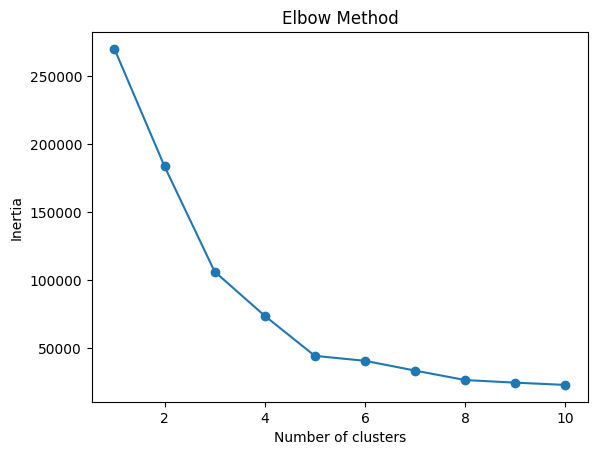

In [20]:
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
